<a href="https://colab.research.google.com/github/ThisIsJorgeLima/DS-Unit-2-Applied-Modeling/blob/master/module1/JAL_Dec_16_assignment_applied_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [X] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [X] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [X] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [X] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

# **Part i - Setup and Load the Data**

*  Load the data as a pandas data frame.

In [2]:
from google.colab import files
files.upload()

Saving Oscars.csv to Oscars.csv


{'Oscars.csv': b'year,category,film,name,BAFTA,Golden Globe,Guild,Oscar,running_time,box_office,imdb_score,rt_audience_score,rt_critic_score,stars_count,writers_count,produced_USA,R,PG,PG13,G,q1_release,q2_release,q3_release,q4_release\n1980,Actor,Raging Bull,Robert De Niro,0.0,1.0,0.0,1.0,129,23400000.0,8.2,93.0,97.0,6.0,2.0,1,1,0,0,0,0,0,0,1\n1980,Actor,The Great Santini,Robert Duvall,0.0,0.0,0.0,0.0,115,4700000.0,7.2,76.0,94.0,3.0,1.0,1,0,1,0,0,0,0,0,1\n1980,Actor,The Elephant Man,John Hurt,1.0,0.0,0.0,0.0,124,26000000.0,8.2,93.0,90.0,5.0,3.0,1,0,1,0,0,0,0,0,1\n1980,Actor,The Stunt Man,Peter O\'Toole,0.0,0.0,0.0,0.0,131,7068886.0,7.2,75.0,89.0,3.0,1.0,1,1,0,0,0,0,1,0,0\n1981,Actor,On Golden Pond,Henry Fonda,0.0,1.0,0.0,1.0,109,119300000.0,7.7,87.0,92.0,6.0,1.0,1,0,1,0,0,1,0,0,0\n1981,Actor,Reds,Warren Beatty,0.0,0.0,0.0,0.0,195,40400000.0,7.5,82.0,94.0,7.0,2.0,1,0,1,0,0,0,0,0,1\n1981,Actor,Atlantic City,Burt Lancaster,1.0,0.0,0.0,0.0,104,12729675.0,7.4,77.0,100.0,7.0,1.0,0,1,0,0,0,0

In [4]:
! head Oscars.csv

year,category,film,name,BAFTA,Golden Globe,Guild,Oscar,running_time,box_office,imdb_score,rt_audience_score,rt_critic_score,stars_count,writers_count,produced_USA,R,PG,PG13,G,q1_release,q2_release,q3_release,q4_release
1980,Actor,Raging Bull,Robert De Niro,0.0,1.0,0.0,1.0,129,23400000.0,8.2,93.0,97.0,6.0,2.0,1,1,0,0,0,0,0,0,1
1980,Actor,The Great Santini,Robert Duvall,0.0,0.0,0.0,0.0,115,4700000.0,7.2,76.0,94.0,3.0,1.0,1,0,1,0,0,0,0,0,1
1980,Actor,The Elephant Man,John Hurt,1.0,0.0,0.0,0.0,124,26000000.0,8.2,93.0,90.0,5.0,3.0,1,0,1,0,0,0,0,0,1
1980,Actor,The Stunt Man,Peter O'Toole,0.0,0.0,0.0,0.0,131,7068886.0,7.2,75.0,89.0,3.0,1.0,1,1,0,0,0,0,1,0,0
1981,Actor,On Golden Pond,Henry Fonda,0.0,1.0,0.0,1.0,109,119300000.0,7.7,87.0,92.0,6.0,1.0,1,0,1,0,0,1,0,0,0
1981,Actor,Reds,Warren Beatty,0.0,0.0,0.0,0.0,195,40400000.0,7.5,82.0,94.0,7.0,2.0,1,0,1,0,0,0,0,0,1
1981,Actor,Atlantic City,Burt Lancaster,1.0,0.0,0.0,0.0,104,12729675.0,7.4,77.0,100.0,7.0,1.0,0,1,0,0,0,0,1,0,0
1981,Actor,Arthur,

In [5]:
! tail Oscars.csv

2015,Supporting Actress,The Danish Girl,Alicia Vikander,0.0,0.0,1.0,1.0,119,64200000.0,7.0,73.0,69.0,6.0,1.0,0,1,0,0,0,1,0,0,0
2015,Supporting Actress,The Hateful Eight,Jennifer Jason Leigh,0.0,0.0,0.0,0.0,187,155800000.0,7.8,76.0,75.0,10.0,1.0,1,1,0,0,0,0,0,0,1
2015,Supporting Actress,Carol,Rooney Mara,0.0,0.0,0.0,0.0,118,40300000.0,7.2,73.0,94.0,5.0,1.0,0,1,0,0,0,1,0,0,0
2015,Supporting Actress,Spotlight,Rachel McAdams,0.0,0.0,0.0,0.0,129,88300000.0,8.1,93.0,96.0,6.0,2.0,1,1,0,0,0,0,0,0,1
2015,Supporting Actress,Steve Jobs,Kate Winslet,1.0,1.0,0.0,0.0,122,34400000.0,7.2,73.0,86.0,4.0,1.0,1,1,0,0,0,0,0,0,1
2016,Supporting Actress,Fences,Viola Davis,1.0,1.0,1.0,0.0,139,55600000.0,7.4,79.0,93.0,7.0,1.0,1,0,0,1,0,0,0,0,1
2016,Supporting Actress,Moonlight,Naomie Harris,0.0,0.0,0.0,0.0,111,23300000.0,7.9,86.0,98.0,7.0,1.0,1,1,0,0,0,0,0,0,1
2016,Supporting Actress,Lion,Nicole Kidman,0.0,0.0,0.0,0.0,118,76300000.0,8.0,93.0,86.0,4.0,1.0,0,0,0,1,0,1,0,0,0
2016,Supporting Actress,Hidden Figures

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

!pip install category_encoders==2.*
!pip install pandas-profiling==2.*



In [0]:
#Choose your target. Which column in your tabular dataset will you predict?
# Our target is 'Oscars'

from sklearn.model_selection import train_test_split

df['Oscar'] = pd.to_datetime(df['Oscar'], infer_datetime_format=True)

In [104]:
train = df[df['Oscar'] < '1980']
val = df[df.Oscar.dt.year == 1980]
test = df[df['Oscar'] > '1980']

train.shape, val.shape, test.shape

((1482, 24), (0, 24), (0, 24))

In [15]:
# Pandas Profiling can be very slow with medium & large datasets.
# These parameters will make it faster.
# https://github.com/pandas-profiling/pandas-profiling/issues/222

import pandas_profiling

profile_report = train.profile_report(
    check_correlation_pearson=False,
    correlations={
        'pearson': False,
        'spearman': False,
        'kendall': False,
        'phi_k': False,
        'cramers': False,
        'recoded': False,
    },
    plot={'histogram': {'bayesian_blocks_bins': False}},
)

profile_report

In [18]:
# We use the !head method, which by default prints out raw data. 
!head Oscars.csv

year,category,film,name,BAFTA,Golden Globe,Guild,Oscar,running_time,box_office,imdb_score,rt_audience_score,rt_critic_score,stars_count,writers_count,produced_USA,R,PG,PG13,G,q1_release,q2_release,q3_release,q4_release
1980,Actor,Raging Bull,Robert De Niro,0.0,1.0,0.0,1.0,129,23400000.0,8.2,93.0,97.0,6.0,2.0,1,1,0,0,0,0,0,0,1
1980,Actor,The Great Santini,Robert Duvall,0.0,0.0,0.0,0.0,115,4700000.0,7.2,76.0,94.0,3.0,1.0,1,0,1,0,0,0,0,0,1
1980,Actor,The Elephant Man,John Hurt,1.0,0.0,0.0,0.0,124,26000000.0,8.2,93.0,90.0,5.0,3.0,1,0,1,0,0,0,0,0,1
1980,Actor,The Stunt Man,Peter O'Toole,0.0,0.0,0.0,0.0,131,7068886.0,7.2,75.0,89.0,3.0,1.0,1,1,0,0,0,0,1,0,0
1981,Actor,On Golden Pond,Henry Fonda,0.0,1.0,0.0,1.0,109,119300000.0,7.7,87.0,92.0,6.0,1.0,1,0,1,0,0,1,0,0,0
1981,Actor,Reds,Warren Beatty,0.0,0.0,0.0,0.0,195,40400000.0,7.5,82.0,94.0,7.0,2.0,1,0,1,0,0,0,0,0,1
1981,Actor,Atlantic City,Burt Lancaster,1.0,0.0,0.0,0.0,104,12729675.0,7.4,77.0,100.0,7.0,1.0,0,1,0,0,0,0,1,0,0
1981,Actor,Arthur,

In [19]:
# We use the !tail method, which by default prints out raw data. 
!tail Oscars.csv

2015,Supporting Actress,The Danish Girl,Alicia Vikander,0.0,0.0,1.0,1.0,119,64200000.0,7.0,73.0,69.0,6.0,1.0,0,1,0,0,0,1,0,0,0
2015,Supporting Actress,The Hateful Eight,Jennifer Jason Leigh,0.0,0.0,0.0,0.0,187,155800000.0,7.8,76.0,75.0,10.0,1.0,1,1,0,0,0,0,0,0,1
2015,Supporting Actress,Carol,Rooney Mara,0.0,0.0,0.0,0.0,118,40300000.0,7.2,73.0,94.0,5.0,1.0,0,1,0,0,0,1,0,0,0
2015,Supporting Actress,Spotlight,Rachel McAdams,0.0,0.0,0.0,0.0,129,88300000.0,8.1,93.0,96.0,6.0,2.0,1,1,0,0,0,0,0,0,1
2015,Supporting Actress,Steve Jobs,Kate Winslet,1.0,1.0,0.0,0.0,122,34400000.0,7.2,73.0,86.0,4.0,1.0,1,1,0,0,0,0,0,0,1
2016,Supporting Actress,Fences,Viola Davis,1.0,1.0,1.0,0.0,139,55600000.0,7.4,79.0,93.0,7.0,1.0,1,0,0,1,0,0,0,0,1
2016,Supporting Actress,Moonlight,Naomie Harris,0.0,0.0,0.0,0.0,111,23300000.0,7.9,86.0,98.0,7.0,1.0,1,1,0,0,0,0,0,0,1
2016,Supporting Actress,Lion,Nicole Kidman,0.0,0.0,0.0,0.0,118,76300000.0,8.0,93.0,86.0,4.0,1.0,0,0,0,1,0,1,0,0,0
2016,Supporting Actress,Hidden Figures

# **Part ii - Validate the Data**

*  Load the data as a pandas data frame.

In [0]:
# Looking at the help documentation:
?pd.read_csv

In [21]:
# We use the pandas method pandas.read_csv("filepath") to create a DataFrame 
# and assign it to a variable df.
# Number of variables	24
# Number of observations	1482
# We'll use the head() method, which by default prints out the first 5 rows. 
# We're supposed to have 1482 observations (rows) and 24 columns. 

pd.options.display.max_rows=1482
pd.options.display.max_columns=24

df = pd.read_csv('Oscars.csv')

df.replace("?", np.NaN)
print(df.shape)
df.head(3)

(1482, 24)


,year,category,film,name,BAFTA,Golden Globe,Guild,Oscar,running_time,box_office,imdb_score,rt_audience_score,rt_critic_score,stars_count,writers_count,produced_USA,R,PG,PG13,G,q1_release,q2_release,q3_release,q4_release
0,1980,Actor,Raging Bull,Robert De Niro,0.0,1.0,0.0,1.0,129,23400000.0,8.2,93.0,97.0,6.0,2.0,1,1,0,0,0,0,0,0,1
1,1980,Actor,The Great Santini,Robert Duvall,0.0,0.0,0.0,0.0,115,4700000.0,7.2,76.0,94.0,3.0,1.0,1,0,1,0,0,0,0,0,1
2,1980,Actor,The Elephant Man,John Hurt,1.0,0.0,0.0,0.0,124,26000000.0,8.2,93.0,90.0,5.0,3.0,1,0,1,0,0,0,0,0,1


In [22]:
# Then the tail method. Also for the last 3 values.
df.tail(3)

,year,category,film,name,BAFTA,Golden Globe,Guild,Oscar,running_time,box_office,imdb_score,rt_audience_score,rt_critic_score,stars_count,writers_count,produced_USA,R,PG,PG13,G,q1_release,q2_release,q3_release,q4_release
1479,2016,Supporting Actress,Lion,Nicole Kidman,0.0,0.0,0.0,0.0,118,76300000.0,8.0,93.0,86.0,4.0,1.0,0,0,0,1,0,1,0,0,0
1480,2016,Supporting Actress,Hidden Figures,Octavia Spencer,0.0,0.0,0.0,0.0,127,169100000.0,7.9,94.0,92.0,6.0,2.0,1,0,1,0,0,1,0,0,0
1481,2016,Supporting Actress,Manchester by the Sea,Michelle Williams,0.0,0.0,0.0,0.0,137,60700000.0,8.1,81.0,96.0,4.0,1.0,1,1,0,0,0,0,0,0,1


# **Part iii - Data Exploration**

In [0]:
df.dtypes

year                   int64
category              object
film                  object
name                  object
BAFTA                float64
Golden Globe         float64
Guild                float64
Oscar                float64
running_time           int64
box_office           float64
imdb_score           float64
rt_audience_score    float64
rt_critic_score      float64
stars_count          float64
writers_count        float64
produced_USA           int64
R                      int64
PG                     int64
PG13                   int64
G                      int64
q1_release             int64
q2_release             int64
q3_release             int64
q4_release             int64
dtype: object

In [0]:
# Here we can see the breakdown of the count, mean, std, min, and percentile by 25%,50%,75%
# Min Oscar since 1980. Oscars have been around since 1920. May need to find more data...
df.describe()

,year,BAFTA,Golden Globe,Guild,Oscar,running_time,box_office,imdb_score,rt_audience_score,rt_critic_score,stars_count,writers_count,produced_USA,R,PG,PG13,G,q1_release,q2_release,q3_release,q4_release
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1.482000e+03,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,1998.530364,0.134278,0.207827,0.089744,0.193657,125.996626,1.277361e+08,7.576181,82.024291,86.842105,5.726721,1.217949,0.740216,0.600540,0.145749,0.244265,0.009447,0.354926,0.101889,0.145749,0.397436
std,10.705597,0.341066,0.405889,0.285911,0.395297,24.018688,1.619649e+08,0.518704,9.726410,10.499962,2.840852,0.546675,0.438664,0.489953,0.352973,0.429795,0.096767,0.478652,0.302605,0.352973,0.489533
min,1980.000000,0.000000,0.000000,0.000000,0.000000,80.000000,5.385340e+05,5.800000,36.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,0.000000,0.000000,0.000000,0.000000,110.000000,2.610000e+07,7.300000,78.000000,82.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1999.000000,0.000000,0.000000,0.000000,0.000000,122.000000,6.390000e+07,7.600000,83.000000,90.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,0.000000,0.000000,0.000000,0.000000,137.000000,1.745750e+08,7.900000,89.000000,94.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,360.000000,1.416000e+09,9.300000,98.000000,100.000000,22.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Lets double check to see of our observations are to par:
# Everything should hit 1482
# A great way to get an overview of our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 24 columns):
year                 1482 non-null int64
category             1482 non-null object
film                 1482 non-null object
name                 1482 non-null object
BAFTA                1482 non-null float64
Golden Globe         1482 non-null float64
Guild                1482 non-null float64
Oscar                1482 non-null float64
running_time         1482 non-null int64
box_office           1482 non-null float64
imdb_score           1482 non-null float64
rt_audience_score    1482 non-null float64
rt_critic_score      1482 non-null float64
stars_count          1482 non-null float64
writers_count        1482 non-null float64
produced_USA         1482 non-null int64
R                    1482 non-null int64
PG                   1482 non-null int64
PG13                 1482 non-null int64
G                    1482 non-null int64
q1_release           1482 non-null int64
q2_releas

In [0]:
# I see problems up ahead with this space inbetween. 
# Lets add an underscore instead to simplify this
df.rename(columns = {'Golden Globe':'Golden_Globe'}, inplace = True)

In [41]:
# Lets check and see if everthing looks good:
# and it does!
df.columns

Index(['year', 'category', 'film', 'name', 'BAFTA', 'Golden_Globe', 'Guild',
       'Oscar', 'running_time', 'box_office', 'imdb_score',
       'rt_audience_score', 'rt_critic_score', 'stars_count', 'writers_count',
       'produced_USA', 'R', 'PG', 'PG13', 'G', 'q1_release', 'q2_release',
       'q3_release', 'q4_release'],
      dtype='object')

In [28]:
# Checking to see if they're any duplicate films:
# I believe these were nominated seven times.
# Lets run a more indepth evaluation and make counts.
df['film'].value_counts().head()

Silver Linings Playbook    7
Reds                       7
Chicago                    7
American Hustle            7
Terms of Endearment        7
Name: film, dtype: int64

In [32]:
# more indepth evaluation based on nominations:
#*******************************************************************************
# Silver Linings: Best Actor (1), Best Actress (2),Adapted Screenplay (3), 
# Director (4), Best Picture (5), Supporting Actor (6),Supporting Actress (7).
#*******************************************************************************
# Reds: Best Actor (1), Best Actress (2), Director (3), Original Screenplay (4),
# Best Picture (5), Supporting Actor (6), Supporting Actress (7).
#*******************************************************************************
# Chicago: Best Actress (1), Adapted Screenplay (2), Director (3), Best Picture (4),
# Supporting Actor (5), Supporting Actress (6), Supporting Actress (7).
#*******************************************************************************
# American Hustle: Best Actor (1), Best Actress (2), Director (3), Original Screenplay (4),
# Best Picture (5), Supporting Actor (6), Original Screenplay (7).
#*******************************************************************************
# Terms of Endearment: Best Actress (1), Best Actress (2), Adapted Screenplay (3),
# Director (4), Best Picture (5), Supporting Actor (6), Supporting Actor (7).
#*******************************************************************************
films = df['film'].value_counts().iloc[0:5].keys()
df[df['film'].isin(films)]

,year,category,film,name,BAFTA,Golden Globe,Guild,Oscar,running_time,box_office,imdb_score,rt_audience_score,rt_critic_score,stars_count,writers_count,produced_USA,R,PG,PG13,G,q1_release,q2_release,q3_release,q4_release
5,1981,Actor,Reds,Warren Beatty,0.0,0.0,0.0,0.0,195,40400000.0,7.5,82.0,94.0,7.0,2.0,1,0,1,0,0,0,0,0,1
156,2012,Actor,Silver Linings Playbook,Bradley Cooper,0.0,0.0,0.0,0.0,122,236400000.0,7.8,86.0,92.0,5.0,1.0,1,1,0,0,0,0,0,0,1
161,2013,Actor,American Hustle,Christian Bale,0.0,0.0,0.0,0.0,138,251100000.0,7.3,74.0,93.0,5.0,2.0,1,1,0,0,0,0,0,0,1
185,1981,Actress,Reds,Diane Keaton,0.0,0.0,0.0,0.0,195,40400000.0,7.5,82.0,94.0,7.0,2.0,1,0,1,0,0,0,0,0,1
194,1983,Actress,Terms of Endearment,Shirley MacLaine,0.0,1.0,0.0,1.0,132,108400000.0,7.4,84.0,88.0,5.0,1.0,1,0,1,0,0,0,0,0,1
197,1983,Actress,Terms of Endearment,Debra Winger,0.0,0.0,0.0,0.0,132,108400000.0,7.4,84.0,88.0,5.0,1.0,1,0,1,0,0,0,0,0,1
291,2002,Actress,Chicago,Rene Zellweger,0.0,1.0,1.0,0.0,113,306800000.0,7.2,83.0,86.0,5.0,1.0,1,0,0,1,0,1,0,0,0
337,2012,Actress,Silver Linings Playbook,Jennifer Lawrence,0.0,1.0,1.0,1.0,122,236400000.0,7.8,86.0,92.0,5.0,1.0,1,1,0,0,0,0,0,0,1
343,2013,Actress,American Hustle,Amy Adams,0.0,1.0,0.0,0.0,138,251100000.0,7.3,74.0,93.0,5.0,2.0,1,1,0,0,0,0,0,0,1
376,1983,Adapted Screenplay,Terms of Endearment,James L. Brooks,0.0,1.0,0.0,1.0,132,108400000.0,7.4,84.0,88.0,5.0,1.0,1,0,1,0,0,0,0,0,1


In [57]:
# Let's look at the correlation between possibly winning 
# one of these awards before winning an Oscar as an effect:

print ('BAFTA wins and losses:')
print (df.BAFTA.value_counts())
print ('*************************')
print ('Golden Globes wins and losses:')
print (df.Golden_Globe.value_counts())
print ('*************************')
print ('Guild wins and losses:')
print (df.Guild.value_counts())
print ('*************************')
print ('Oscar wins and losses')
print (df.Oscar.value_counts())


BAFTA wins and losses:
0.0    1283
1.0     199
Name: BAFTA, dtype: int64
*************************
Golden Globes wins and losses:
0.0    1174
1.0     308
Name: Golden_Globe, dtype: int64
*************************
Guild wins and losses:
0.0    1349
1.0     133
Name: Guild, dtype: int64
*************************
Oscar wins and losses
0.0    1195
1.0     287
Name: Oscar, dtype: int64


In [63]:
# nulls as missing values. 
# We'll subset our data by choosing ALL the rows that have missing values.

print('The number of rows with Missing Values are: ')
df.isnull().any(axis=1).sum()

The number of rows with Missing Values are: 


0

In [64]:
# Lets take a look at verifying top audience_score by Oscar by mean:
df=df.fillna(value=0,axis=1)
df=df[df['rt_audience_score']!='Score']
df.groupby('rt_audience_score')['Oscar'].mean().sort_values()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


rt_audience_score
36.0    0.000000
75.0    0.000000
68.0    0.000000
66.0    0.000000
65.0    0.000000
58.0    0.000000
56.0    0.000000
55.0    0.000000
54.0    0.000000
53.0    0.000000
70.0    0.000000
98.0    0.000000
52.0    0.000000
48.0    0.000000
47.0    0.000000
37.0    0.000000
45.0    0.000000
38.0    0.000000
40.0    0.000000
42.0    0.000000
72.0    0.062500
74.0    0.073171
76.0    0.081081
67.0    0.100000
60.0    0.100000
78.0    0.100000
62.0    0.111111
79.0    0.113208
73.0    0.115385
61.0    0.125000
69.0    0.130435
71.0    0.142857
81.0    0.148649
83.0    0.150000
89.0    0.151163
91.0    0.159091
64.0    0.166667
82.0    0.185714
88.0    0.193548
77.0    0.204082
94.0    0.212766
86.0    0.214286
80.0    0.230769
96.0    0.235294
87.0    0.250000
85.0    0.255814
84.0    0.309091
97.0    0.333333
59.0    0.333333
51.0    0.333333
93.0    0.360656
92.0    0.378378
90.0    0.385965
95.0    0.459459
57.0    0.500000
49.0    0.500000
Name: Oscar, dtype: float64

In [97]:
# Here I made a crosstab to compare and contrast Running Time to Oscar:
pd.crosstab(df['running_time'], df['Oscar'])

Oscar,0.0,1.0
running_time,,
80,1,0
81,3,0
82,1,0
83,1,0
84,4,0
85,1,0
88,3,0
90,3,1
91,9,1


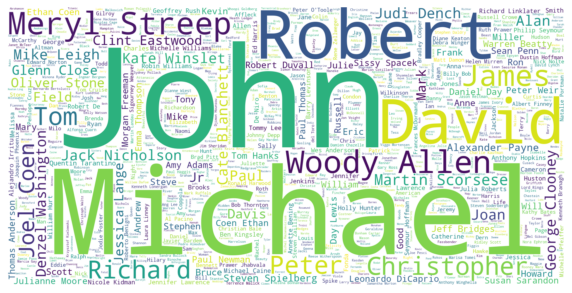

In [101]:
# Names with the most nominations:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="white",width=2000,height=1000).generate(" ".join(df['name']))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

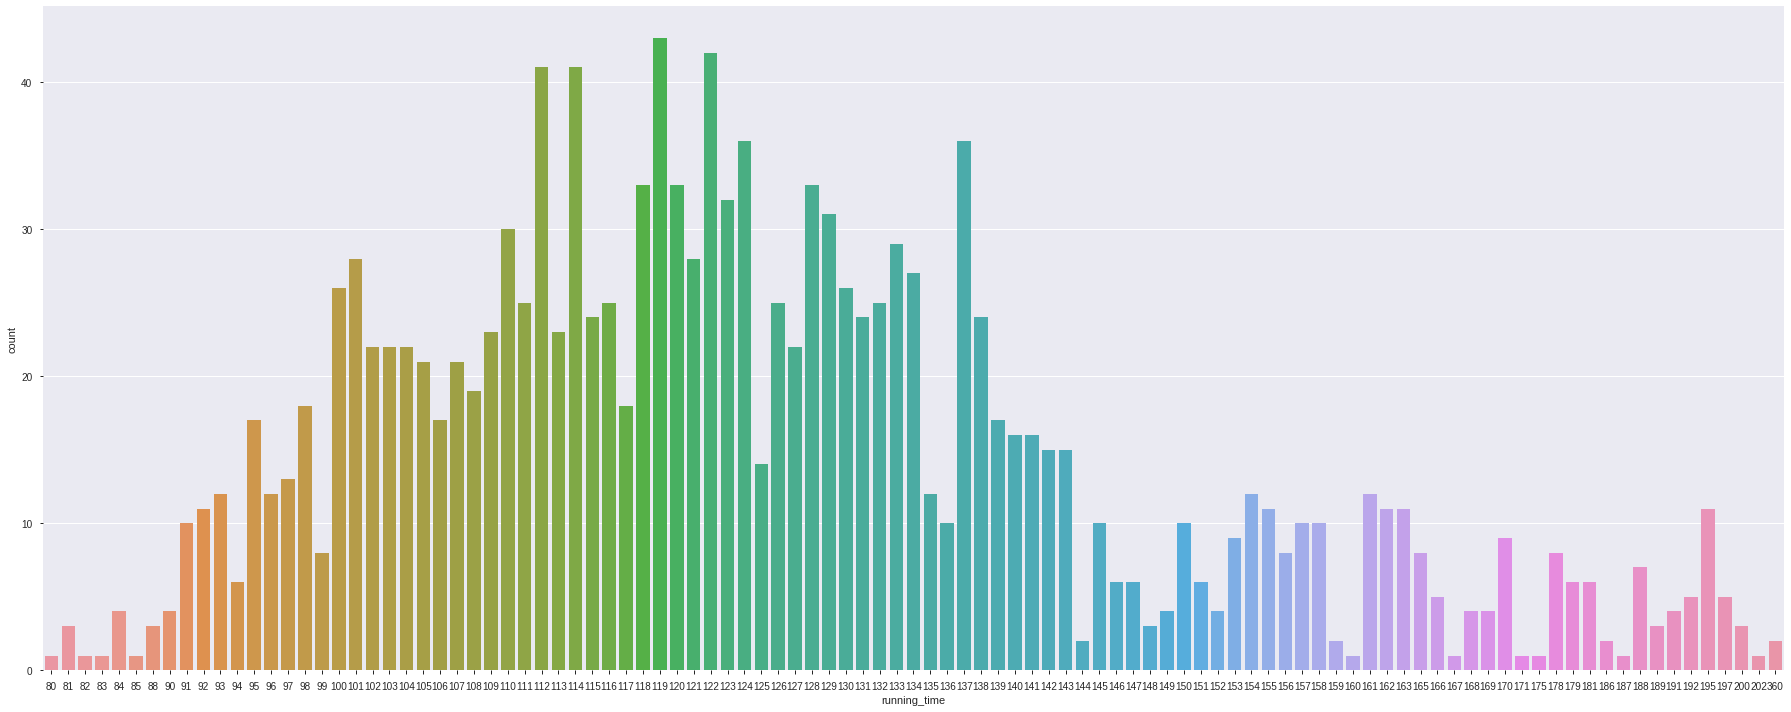

In [83]:
import matplotlib.pyplot as plt
# Lets now find Running Time vs winning an Oscar:

plt.figure(figsize=(25,10)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x="running_time", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.tight_layout()
plt.show()

In [86]:
# Lets find out the total of number of years in Oscar Dataset: 
print('There are a total of',df['year'].nunique(),'years in the dataset: ',df['year'].unique())

There are a total of 37 years in the dataset:  [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016]


In [90]:
# use this function: df_ratings=df['category'].unique()
# Total number of categories for noms:

print('Within this dataset, there are',df['category'].nunique(),
      'eight nomination categories ranging: ',df['category'].unique())

Within this dataset, there are 8 eight nomination categories ranging:  ['Actor' 'Actress' 'Adapted Screenplay' 'Director' 'Original Screenplay'
 'Picture' 'Supporting Actor' 'Supporting Actress']


In [94]:
# Here we are verifing amount of films in this dataset: 
print('The number of films nominated in 37 years:',df['film'].nunique())

The number of films nominated in 37 years: 638


## How is your target distributed?

Classification: How many classes? Are the classes imbalanced?




In [0]:
# Classification: How many classes? Are the classes imbalanced?
y = df['Oscar']

In [114]:
y.nunique()

2

In [115]:
y.value_counts(normalize=True)

1970-01-01 00:00:00.000000000    0.806343
1970-01-01 00:00:00.000000001    0.193657
Name: Oscar, dtype: float64

In [116]:
y.value_counts(normalize=True).max()

0.8063427800269906

In [119]:
y.describe()

count                              1482
unique                                2
top                 1970-01-01 00:00:00
freq                               1195
first               1970-01-01 00:00:00
last      1970-01-01 00:00:00.000000001
Name: Oscar, dtype: object

In [121]:
# What do I do with 0 sample(s)?
# (shape=(0, 22)) while a minimum of 1 is required.
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

target = 'Oscar'
features = df.columns.drop([target, 'year'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

ValueError: ignored

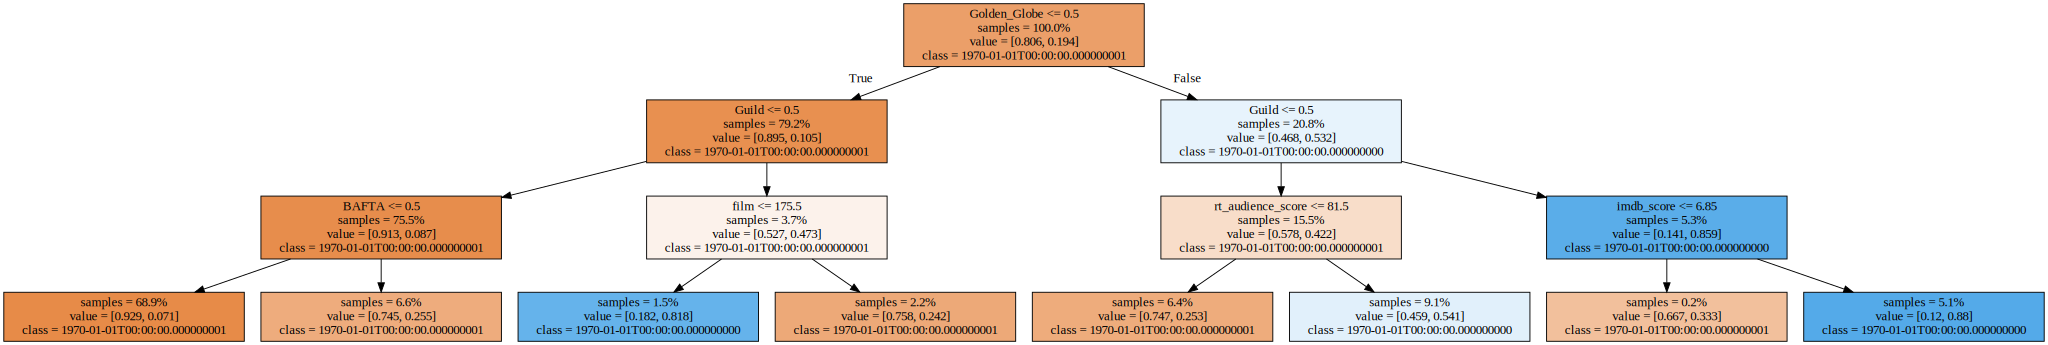

In [122]:
# Visualize decision tree
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)

In [123]:
# Having the same issue here:
target = 'Oscar'
features = df.columns.drop([target, 'year'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

ValueError: ignored

In [124]:
# "The ROC curve is created by plotting the true positive rate (TPR)
# against the false positive (FPR)
# at various threshold settings."

# Use scikit-learn to calculate TPR & FPT at various thresholds
from sklearn.metrics import roc_curve
y_pred_proba = pipeline.predict_proba(X_val)[:, -1] # Probability for the last class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

ValueError: ignored

## choose your evaluation metric(s)

In [0]:
df.isna().sum().sort_values()

In [0]:
df.isna()

In [0]:
df.isna().sum()

In [0]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

target = 'Oscar'
features = df.columns.drop([target, 'year'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

In [0]:
df.fillna('Missing')

In [0]:
df = df.fillna('Missing')

In [0]:
df['year'] < 1973

In [0]:
df['year'] < 1973

In [0]:
target = 'Oscar'
train[target].value_counts(normalize=True)

In [0]:
features = ['year','category','film',
            'name','BAFTA','Golden Globe',
            'Guild','running_time','box_office',
            'imdb_score','rt_audience_score','rt_critic_score',
            'stars_count','writers_count','produced_USA',
            'R','PG','PG13','G','q1_release','q2_release','q3_release',
            'q4_release']


# Assign to X, y
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

model = LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))
